In [11]:
import os
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
# Here specify the path to your directory
!ls "/content/gdrive/My Drive/SpTop_phase2" 
root_path = 'gdrive/My Drive/SpTop_phase2' 
path ='/content/gdrive/My Drive/SpTop_phase2'
os.chdir(path)

Mounted at /content/gdrive
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
mfTraining.dat	my_model.h5


In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as py
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from keras.initializers import glorot_uniform

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("tensorflow version: "+tf.__version__)

tensorflow version: 2.2.0-rc3


In [13]:
dataset_file = "mfTraining.dat"
columns = ['aa', 'tu', 'ts', 'enr']

raw_dataset = pd.read_csv(dataset_file, names=columns, comment='\t', sep="\t", 
                          index_col=False)
dataset = raw_dataset.copy()
dataset

,aa,tu,ts,enr
0,-1.22173,0.000000,0.000000,1.995248
1,-1.22173,0.000000,0.037960,1.995251
2,-1.22173,0.000000,0.084264,1.995262
3,-1.22173,0.000000,0.130555,1.995282
4,-1.22173,0.000000,0.176826,1.995312
...,...,...,...,...
6144420,1.22173,16.656568,16.272940,1.995495
6144421,1.22173,16.656568,16.378325,1.995283
6144422,1.22173,16.656568,16.483662,1.995080
6144423,1.22173,16.656568,16.589185,1.994887


In [0]:
train_dataset = dataset.sample(frac=0.8, random_state=1)
test_dataset  = dataset.drop(train_dataset.index)
validation_dataset = train_dataset.sample(frac=0.2,random_state=1)
train_dataset = train_dataset.drop(validation_dataset.index)

train_labels = train_dataset.pop('enr')
test_labels = test_dataset.pop('enr')
validation_labels = validation_dataset.pop('enr')

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=[3], use_bias=True),
        layers.Dense(2048, activation='relu', use_bias=True),
        layers.Dense(2048, activation='relu', use_bias=True),
        layers.Dense(1, use_bias=True)
    ])
    # optimizer = tf.keras.optimizers.RMSprop(0.0001)
    model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae', 'mse'])
    return model

model = build_model()
model.summary()

In [22]:
# EPOCHS = 40
# history = model.fit(
#     train_dataset, train_labels,
#     epochs=EPOCHS, batch_size = 1000, validation_data = (validation_dataset,
#     validation_labels), verbose=1)

# model.save('my_model.h5')
model = tf.keras.models.load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              526336    
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2049      
Total params: 4,725,761
Trainable params: 4,725,761
Non-trainable params: 0
_________________________________________________________________


In [23]:
_=plt.plot(history.history['loss'])
_=plt.plot(history.history['val_loss'])
_=plt.yscale('log')
_=plt.title('model loss')
_=plt.ylabel('loss')
_=plt.xlabel('epoch')
_=plt.legend(['loss','val_loss'],loc='upper right')

NameError: ignored

Text(0.5, 0, 'True Euclidean-Norm Error')

Text(0, 0.5, 'Predicted Euclidean-Norm Error')

(0.0, 1.0)

(0.0, 1.0)

<bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f7b700962b0>>

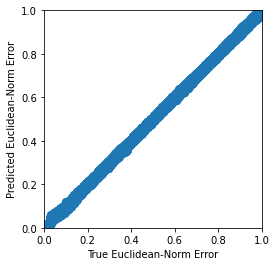

In [25]:
test_predictions = model.predict(test_dataset).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Euclidean-Norm Error')
plt.ylabel('Predicted Euclidean-Norm Error')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

model.predict

-0.0014932231777240695

0.004528577582827967

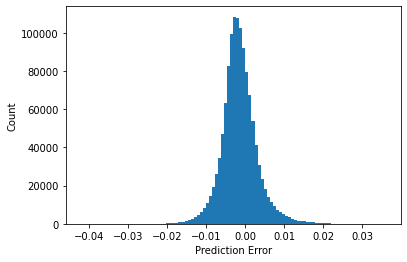

In [26]:
error = (test_predictions - test_labels)
_ = plt.hist(error, bins = 100)
_ = plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")
mean = np.mean(error)
mean
np.std(error)

In [12]:
test = pd.DataFrame({'aa':[30.899693899575e-003], 'tu':[15.6369157427627], 'ts':[121.562458175655e-003]})
test
model.predict(test)

,aa,tu,ts
0,0.0309,15.636916,0.121562


array([[0.08575082]], dtype=float32)